## Local regression

Local regression is a memory-based techniques where we fit different but simple models at each query point $x_0$. 

This is done by using only those observations close to the target point $x0$ to fit the simple model, and in such a way that the resulting estimated function $\hat{f}(X)$ is smooth in $\mathbb{R}^p$. This localization is achieved via a weighting function or kernel $K_λ(x_0,x_i)$, which assigns a weight to $x_i$ based on its distance from $x_0$. The kernels $K_λ$ are typically indexed by a parameter λ that dictates the width of the neighborhood. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from skfda.misc.kernels import epanechnikov, uniform, normal
from skfda.ml.regression._kernel_regression import KernelRegression
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix

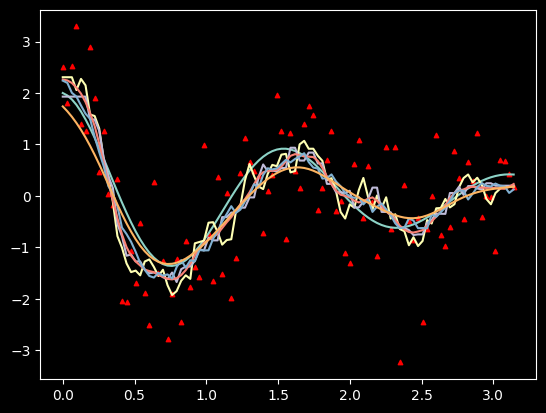

In [ ]:
np.random.seed(42)


def fn(x):
    lam = 0.5
    omega = 4
    return 2 * np.exp(-lam * x) * np.cos(omega * x)


xs = np.linspace(0, np.pi, 100)
plt.plot(xs, fn(xs))
ys = fn(xs) + np.random.standard_normal(xs.shape)
plt.scatter(xs, ys, marker="^", s=10, c="red")

kr = KNeighborsRegressor(n_neighbors=5).fit(xs.reshape(-1, 1), ys)
plt.plot(xs, kr.predict(xs.reshape(-1, 1)))

kr2 = KNeighborsRegressor(n_neighbors=10).fit(xs.reshape(-1, 1), ys)
plt.plot(xs, kr2.predict(xs.reshape(-1, 1)))

ks = KernelRegression(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=0.2, kernel=epanechnikov)
).fit(xs.reshape(-1, 1), ys)
plt.plot(xs, ks.predict(xs.reshape(-1, 1)))

ks2 = KernelRegression(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=0.2, kernel=uniform)
).fit(xs.reshape(-1, 1), ys)
plt.plot(xs, ks2.predict(xs.reshape(-1, 1)))

ks3 = KernelRegression(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=0.2, kernel=normal)
).fit(xs.reshape(-1, 1), ys)
plt.plot(xs, ks3.predict(xs.reshape(-1, 1)))

plt.show()